# Linear Regression

## sklearn.linear_model.LinearRegression

Attributes
1. coef_ 梯度组 相当于$\vec{\omega}x + b$前面的向量$\vec{\omega}$
2. rank_ 秩
3. intercept_ 截距，相当于$\vec{\omega}x + b$后面的截距$b$
4. singular_ 奇异值

In [1]:
import numpy as np

In [4]:
r_np_arrays = np.random.random([30, 2])

In [65]:
X = r_np_arrays[:, 0]
y = r_np_arrays[:, 1]

In [66]:
X

array([0.010986  , 0.11813667, 0.94906154, 0.60352817, 0.77837644,
       0.08839188, 0.96662226, 0.21347977, 0.91323736, 0.7591824 ,
       0.78210011, 0.54727654, 0.67418812, 0.46349628, 0.05497053,
       0.21403868, 0.08647563, 0.28714877, 0.86564481, 0.62829842,
       0.06478898, 0.98791578, 0.3826748 , 0.68486047, 0.45352315,
       0.45648382, 0.42579386, 0.0180044 , 0.91135237, 0.85011396])

In [67]:
y

array([0.30485422, 0.4257966 , 0.05284577, 0.95160841, 0.60436687,
       0.50575859, 0.71116772, 0.28921273, 0.41139484, 0.63963706,
       0.65969397, 0.63723975, 0.14272572, 0.54118527, 0.96036305,
       0.43727876, 0.87050683, 0.47858491, 0.49335425, 0.82845673,
       0.39150429, 0.91287886, 0.95629889, 0.34358532, 0.71936032,
       0.23198357, 0.18292566, 0.80002244, 0.46256654, 0.98483811])

In [73]:
import random
def new_y(x):
    return 13.4 * x + 5 + random.randint(-5, 5)

y = [new_y(y_ele) for y_ele in X]

In [74]:
X = X.reshape(-1, 1)

In [75]:
import matplotlib.pyplot as plt

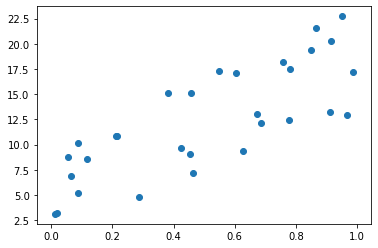

In [76]:
plt.scatter(X, y)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
reg = LinearRegression().fit(X, y)

In [79]:
def f(x):
    return reg.coef_ * x + reg.intercept_

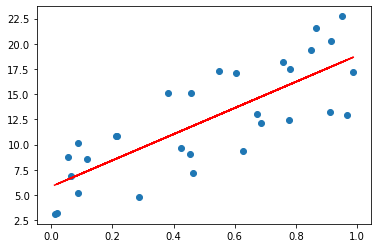

In [80]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

# Email Classification（Naive Bayes Classifier）

将邮件中的垃圾邮件分类出来，依据垃圾邮件和同时出现的文字的概率，进行分类。$w_1$$w_2$等代表相关的文字。

$P(Spam|w_1w_2w_3w_4) = \frac{P(w_1w_2w_3w_4|Spam)P(Spam)}{P(w_1w_2w_3w_4)}$

$P(\overline{Spam}|w_1w_2w_3w_4) = \frac{P(w_1w_2w_3w_4|\overline{Spam})P(\overline{Spam})}{P(w_1w_2w_3w_4)}$

根据比较上述属于或不属于垃圾邮件的概率，决定是否分为垃圾邮件。
其中$P(Spam)$代表先验概率(prior probability)，即整个样本中spam的概率。可以认为先验概率是整个大环境的概率。

$P(w_1w_2w_3w_4|Spam)P(Spam)$  
$= P(w_1w_2w_3w_4Spam)$  
$= P(w_1|w_2w_3w_4Spam)P(w_2w_3w_4Spam)$  
$= P(w_1|w_2w_3w_4Spam)P(w_2|w_3w_4Spam)P(w_3w_4Spam)$  
$= P(w_1|w_2w_3w_4Spam)P(w_2|w_3w_4Spam)P(w_3|w_4Spam)P(w_4|Spam)P(Spam)$

在最理想的情况下，贝叶斯公式的分子部分可以按照上述方式分解，但我们可以假定每一个词出现与否只和一个因素相关，则类似$P(w_1|w_2w_3w_4Spam)$可以简化为$P(w_1|Spam)$

所以将上式简化成$P(w_1|Spam)P(w_2|Spam)...P(w_n|Spam)P(Spam)$  
即$\prod_{i=1}^{n}P(w_i|Spam)*P(Spam)$

### 朴素贝叶斯分类器的特点
1. 不是绝对分类，而是给了两极可能性的对比，可以考虑从对比中判断类别。

# K-nearest Neighbors

KNN也就是K近邻算法，本质上就是寻找需要分类的点周围最近的K个训练点，然后根据这K个训练点的特征来分类。所以KNN是一种原理简单但是很强大，适用性很广的分类算法。  
Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

缺点：
1. 需要大量storage
2. Inference speed很慢
3. 无法处理异常值("outliner")，对异常值比较敏感  

优点：
1. 理论上可以拟合任何可能的复杂的函数

讨论点：
1. k值的选择，如果过小，则容易受到噪声干扰产生**过拟合**，如果过大，则会有可能被分到远离近邻点的类中。
> 降低k值的影响，可以根据距离来加权。例如：$Weight = \frac{1}{distance}$

### sklearn.neighbors.KNeighborsClassifier

n_neighbors: int  
weights: str or callable {'uniform', 'distance', callable}   
weights决定与距离相关的权重，用来降低k值得影响。uniform是权重一定，distance是根据距离加权，猜测是$\frac{1}{distance}$，callable是接收一个距离数组，返回一个等长的加权数组。

# Decision Tree

In [88]:
import pandas as pd
import numpy as np

In [87]:
from collections import Counter

In [131]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [132]:
df = pd.DataFrame(mock_data)

In [133]:
df

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


$$ Entropy = -\sum_i^n P(x_i) log(P(x_i)) $$

In [134]:
def entropy(x):
    counter = Counter(x)
    total_entropy = float()
    
    for el in counter:
        p = counter[el] / len(x)
        
        total_entropy += - p * np.log(p)
    return total_entropy

In [135]:
entropy([1,1,1,0])

0.5623351446188083

In [136]:
def find_optimal_separator(data_frame: pd.DataFrame, target: str):
    x_fields = set(data_frame.columns.tolist()) - {target}
    min_entropy = float('inf')
    
    for f in x_fields:
        print(f)
        values = set(data_frame[f].tolist())
        
        for v in values:
            sub_entropy_1 = entropy(data_frame[data_frame[f] == v][target].tolist())
            print(sub_entropy_1)
            sub_entropy_2 = entropy(data_frame[data_frame[f] != v][target].tolist())
            print(sub_entropy_2)
            
            total_entropy = sub_entropy_1 + sub_entropy_2
            
            if total_entropy < min_entropy:
                min_entropy = total_entropy
                splitor = (f, v)
    print(min_entropy)
    return splitor
        

In [137]:
find_optimal_separator(df, 'bought')

gender
0.6365141682948128
0.5623351446188083
0.5623351446188083
0.6365141682948128
income
0.0
0.6730116670092565
0.6730116670092565
0.0
family_number
0.6730116670092565
0.0
0.0
0.6730116670092565
0.6730116670092565


('income', '-10')

In [138]:
df[df['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [139]:
find_optimal_separator(df[df['family_number'] == 1], 'bought')

gender
0.0
0.6365141682948128
0.6365141682948128
0.0
income
0.0
0.5623351446188083
0.5623351446188083
0.0
family_number
0.6730116670092565
0.0
0.5623351446188083


('income', '-10')

# Evaluation 如何评价一个模型的好坏

## Example
Real tags:  
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1]  
Model:  
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1]

## Accuracy

预测的标签中，预测正确的值的个数/总的预测的个数

7/10

##  Precision

所有说“是”并且预测正确的个数/所有说“是”的个数  
**宁可错杀一千，绝不放过一个**

5/8

## Recall

所有说“是”并且预测正确的个数/所有真正的标签确实为“是”的个数  
**绝不错杀一个**

5/6

Recall 和 Precision往往是trade off的，一个高另一个往往比较低。所以引入了下面的分数

## F1 Score = $\frac{2P(Precision)P(Recall)}{P(Precision)+P(Recall)}$

## AUC - Area Under Curve

设横坐标轴为“认为高于某一个阈值为正确”里面的阈值，最大为1，如50%代表判断预测的可能性为50%以上时，被分到该类中。  
纵坐标为准确率，可以为Recall/Precision/F1 Score，其中F1 score用得比较多，因为考虑的比较全面。  